In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

In [2]:
sys.path.append("../")

In [3]:
from lib import lightcurve as lc
from lib import functions as func

In [4]:
lc_bins = np.genfromtxt("../data/time.txt")
lc_bc = (lc_bins[:-1] + lc_bins[1:]) / 2.

In [5]:
lc_state = np.genfromtxt("../data/flux.txt")

In [6]:
thr = 5e-8

In [7]:
s = lc.LightCurve(lc_bins, lc_state[:-1], thr)

In [8]:
rand_idx = np.random.choice(len(lc_state), len(lc_state))
s_rand = lc.LightCurve(lc_bins, lc_state[rand_idx[:-1]], thr)

Text(0.5, 0, 'MJD')

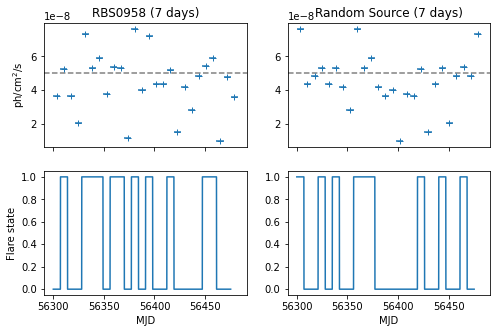

In [9]:
fig, ax = plt.subplots(2,2,figsize=(8,5), sharex=True)
ax[0][0].set_title("RBS0958 (7 days)")
ax[0][0].errorbar(lc_bins+3.5, lc_state, xerr=3.5, ls="", marker='+')
ax[0][0].axhline(thr, ls='--', color='gray')
ax[0][0].set_ylabel(r"ph/cm$^{2}$/s")

x = np.linspace(lc_bins[0],lc_bins[-1],10000)
y = s(x)
ax[1][0].plot(x,y)
ax[1][0].set_xlabel("MJD")
ax[1][0].set_ylabel("Flare state")

ax[0][1].set_title("Random Source (7 days)")
ax[0][1].errorbar(lc_bins+3.5, lc_state[rand_idx], xerr=3.5, ls="", marker='+')
ax[0][1].axhline(thr, ls='--', color='gray')

y_rand = s_rand(x)
ax[1][1].plot(x,y_rand)
ax[1][1].set_xlabel("MJD")

In [10]:
sources = np.array([func.make_rnd_lc(lc_bins, lc_state, thr) for i in range(10)])

In [11]:
bkg_tr = func.background_trials(100000,sources,lc_bins)

100%|██████████| 100000/100000 [01:05<00:00, 1516.53it/s]


In [12]:
sig_tr = []
for i in range(9):
    i += 1
    sig_tr.append(func.signal_trials(100000,i,sources,lc_bins))
sig_tr = np.array(sig_tr)

100%|██████████| 100000/100000 [00:14<00:00, 6968.37it/s]


In [13]:
mu = np.mean(bkg_tr)
print(mu)

4.07975


In [14]:
mu_s = np.mean(sig_tr, axis=1)
print(mu_s)

[4.66958 5.25555 5.85753 6.44815 7.03675 7.63894 8.22105 8.81442 9.40688]


(0.0, 10.5)

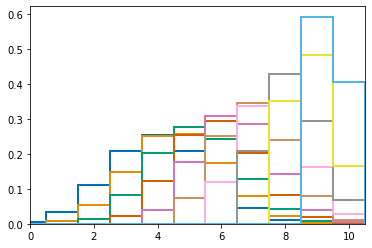

In [15]:
fig, ax = plt.subplots()
colors = sns.color_palette("colorblind", len(sig_tr)+1)
xbins = np.linspace(-0.5,len(sources)+0.5,len(sources)+2)
ax.hist(bkg_tr, bins=xbins, histtype='step', lw=2, color=colors[0], density=True)
for i, tr in enumerate(sig_tr):
    ax.hist(tr, bins=xbins, histtype='step', lw=2, color=colors[i+1], density=True)

ax.set_xlim(0.,len(sources)+0.5)

In [16]:
val, _ = np.histogram(bkg_tr, bins=xbins, density=True)
cum_val = 1. - np.cumsum(val)

In [17]:
val_s = []
cumval_s = []
for tr in sig_tr:
    vals = np.histogram(tr, bins=xbins, density=True)[0]
    cum_vals = 1. - np.cumsum(vals)
    val_s.append(vals)
    cumval_s.append(cum_vals)

In [18]:
def prob(n, cum_vals):
    return(cum_vals[n])

In [19]:
pdf = np.array([val, *val_s])

In [20]:
pdf /= np.sum(pdf)

In [21]:
print(pdf)

[[4.5700e-04 3.5010e-03 1.1129e-02 2.0935e-02 2.5433e-02 2.0911e-02
  1.1830e-02 4.4820e-03 1.1410e-03 1.6800e-04 1.3000e-05]
 [0.0000e+00 8.3200e-04 5.4070e-03 1.4941e-02 2.5189e-02 2.5605e-02
  1.7474e-02 7.9420e-03 2.2390e-03 3.5200e-04 1.9000e-05]
 [0.0000e+00 0.0000e+00 1.3810e-03 8.2940e-03 2.0220e-02 2.7834e-02
  2.4145e-02 1.2951e-02 4.2920e-03 8.3200e-04 5.1000e-05]
 [0.0000e+00 0.0000e+00 0.0000e+00 2.3770e-03 1.2269e-02 2.5398e-02
  2.9584e-02 2.0154e-02 8.1570e-03 1.8920e-03 1.6900e-04]
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 4.0930e-03 1.7721e-02
  3.0896e-02 2.8593e-02 1.4382e-02 3.8950e-03 4.2000e-04]
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 7.2900e-03
  2.5017e-02 3.4613e-02 2.3972e-02 8.0240e-03 1.0840e-03]
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  1.1957e-02 3.3864e-02 3.5210e-02 1.6266e-02 2.7030e-03]
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 2.0816e-02 4.2945e-02 2.9557e-02 6.68

../lib/functions.py:43: RuntimeWarning: divide by zero encountered in true_divide
  lik = np.log(p_zero/p_h)


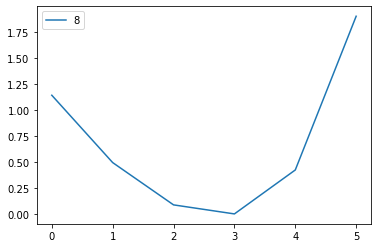

In [39]:
fig, ax = plt.subplots()
prof_lik = func.prof_likelihood(6,pdf)
ax.plot(range(len(prof_lik)), prof_lik, label=f"{i}")
ax.legend()

In [23]:
ts = []
for n in bkg_tr:
    ts.append(func.test_statistic(n,pdf))
ts = np.array(ts)
ts[ts<0.] = 0.

In [24]:
np.sum(ts<0.)/len(ts)

0.0

In [25]:
from scipy.stats import chi2

def chi_squared(x, ndof):
    return chi2.pdf(x, ndof)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/usr/local/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Text(0.5, 0, 'Test Statistic')

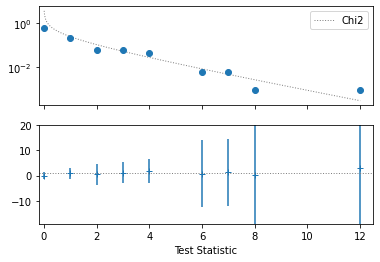

In [26]:
fig, ax = plt.subplots(2,1, sharex=True)
tsbins = np.linspace(-2.5, 12.5, 16)
tsc = (tsbins[:-1] + tsbins[1:]) / 2.
vals = np.histogram(ts, bins=tsbins, density=True)[0]
val_err = np.sqrt(vals) / vals
ax[0].errorbar(tsc, vals, ls="", marker='o')
ax[0].semilogy()

from scipy.optimize import curve_fit
popt, _ = curve_fit(chi_squared, tsc, vals, p0=[1.])
x=np.linspace(0.,12,1000)
ax[0].plot(x, chi_squared(x, popt[0]), ls=':', color='gray', lw=1, label='Chi2')

ax[0].set_xlim([-0.2, 12.5])
ax[0].legend()

ax[1].errorbar(tsc[vals!=0], vals[vals!=0]/chi_squared(tsc[vals!=0], popt[0]), yerr=val_err[vals!=0], ls="", marker='+')
ax[1].set_ylim([-19,20.])
ax[1].axhline(1., color='gray', ls=':', lw=1)

ax[1].set_xlabel("Test Statistic")